In [ ]:
import pandas as pd
import urllib.request
import time
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception, MobileNetV2

In [ ]:
!mkdir /content/images

In [ ]:
df = pd.read_csv('/content/image_url.csv')

# 이미지 저장

In [ ]:
#get

for i in range(len(df['url'])):
  url = df['url'][i]
  urllib.request.urlretrieve(url, '/content/images/thumbnail{0:04d}.jpg'.format(i))
  print('image {} 저장'.format(i))

image 71 저장
image 72 저장
image 73 저장
image 74 저장
image 75 저장
image 76 저장
image 77 저장
image 78 저장
image 79 저장
image 80 저장
image 81 저장
image 82 저장
image 83 저장
image 84 저장
image 85 저장
image 86 저장
image 87 저장
image 88 저장
image 89 저장
image 90 저장
image 91 저장
image 92 저장
image 93 저장
image 94 저장
image 95 저장
image 96 저장
image 97 저장
image 98 저장
image 99 저장
image 100 저장
image 101 저장
image 102 저장
image 103 저장
image 104 저장
image 105 저장
image 106 저장
image 107 저장
image 108 저장
image 109 저장
image 110 저장
image 111 저장
image 112 저장
image 113 저장
image 114 저장
image 115 저장
image 116 저장
image 117 저장
image 118 저장
image 119 저장
image 120 저장
image 121 저장
image 122 저장
image 123 저장
image 124 저장
image 125 저장
image 126 저장
image 127 저장
image 128 저장
image 129 저장
image 130 저장
image 131 저장
image 132 저장
image 133 저장
image 134 저장
image 135 저장
image 136 저장
image 137 저장
image 138 저장
image 139 저장
image 140 저장
image 141 저장
image 142 저장
image 143 저장
image 144 저장
image 145 저장
image 146 저장
image 147 저장
image 148 저장
image 149 저장
im

# 이미지 특징 추출

## 이미지 로드 함수

In [ ]:
def load_image(filename):
  image = tf.io.read_file('/content/images/{}'.format(filename))
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  return image

## 모델 생성 함수

In [ ]:
#create model

def create_model(model_name, verbose=False):
  input_tensor = Input(shape=(90, 83, 3))
  
  #include_top = False - output layer 제외하고 가져옴

  if model_name =='vgg16':
    base_model = VGG16(input_tensor = input_tensor, include_top = False, weights = 'imagenet')  #imagenet기반으로 학습된 weight 가져옴.
  elif model_name =='vgg19':
    base_model = VGG19(input_tensor = input_tensor, include_top = False, weights = 'imagenet')  #imagenet기반으로 학습된 weight 가져옴.
  elif model_name == 'resnet50':  #연산 많음
    base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
  elif model_name == 'xception':
    base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
  elif model_name=='mobilenet':
    base_model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

  bm_output = base_model.output

  x= GlobalAveragePooling2D()(bm_output)

  # if model_name != 'vgg16':
  #   output = Dropout(rate=0.5)(x)

  output = Dense(4000, activation='relu', name='fc1')(x)

  model = Model(inputs = input_tensor, outputs=output)

  if verbose:
    model.summary()
  return model

## 결과 추출 함수

In [ ]:
def make_result(filename, model_name):
  image = load_image(filename) #이미지 로드

  image = tf.expand_dims(image, 0) #이미지 전처리
  image = image/255.

  model = create_model(model_name) #모델 생성

  feature = model.predict(image)  #특징 추출

  return feature[0]

# Apply
- 특징 추출
- 파일명, 모델명
- resNet, xception 별로

```
function ClickConnect() {
    console.log('Working');
    document.querySelector('colab-toolbar-button#connect').click();
}
setInterval(ClickConnect, 60000)
```

In [ ]:
#결과 저장할 폴더만들기
# !mkdir /content/drive/MyDrive/image_result

In [ ]:
filenames = os.listdir('/content/images') #이미지 파일명
filenames.sort()

features = []
model_name = 'vgg16'

for filename in filenames:
  feature = make_result(filename, model_name)
  features.append(feature)
  print('{} 완료'.format(filename))
print('특징 추출완료')

#데이터프레임 생성
print('데이터프레임 생성 중')
result_df = pd.DataFrame()
result_df['filename'] = filenames
result_df['feature'] = features

#데이터프레임 저장
result_df.to_csv('/content/drive/MyDrive/image_result/{}_4000.csv'.format(model_name))
print('데이터프레임 저장 완료')



thumbnail0000.jpg 완료
thumbnail0001.jpg 완료
thumbnail0002.jpg 완료
thumbnail0003.jpg 완료
thumbnail0004.jpg 완료
thumbnail0005.jpg 완료
thumbnail0006.jpg 완료
thumbnail0007.jpg 완료
thumbnail0008.jpg 완료
thumbnail0009.jpg 완료
thumbnail0010.jpg 완료
thumbnail0011.jpg 완료
thumbnail0012.jpg 완료
thumbnail0013.jpg 완료
thumbnail0014.jpg 완료
thumbnail0015.jpg 완료
thumbnail0016.jpg 완료
thumbnail0017.jpg 완료
thumbnail0018.jpg 완료
thumbnail0019.jpg 완료
thumbnail0020.jpg 완료
thumbnail0021.jpg 완료
thumbnail0022.jpg 완료
thumbnail0023.jpg 완료
thumbnail0024.jpg 완료
thumbnail0025.jpg 완료
thumbnail0026.jpg 완료
thumbnail0027.jpg 완료
thumbnail0028.jpg 완료
thumbnail0029.jpg 완료
thumbnail0030.jpg 완료
thumbnail0031.jpg 완료
thumbnail0032.jpg 완료
thumbnail0033.jpg 완료
thumbnail0034.jpg 완료
thumbnail0035.jpg 완료
thumbnail0036.jpg 완료
thumbnail0037.jpg 완료
thumbnail0038.jpg 완료
thumbnail0039.jpg 완료
thumbnail0040.jpg 완료
thumbnail0041.jpg 완료
thumbnail0042.jpg 완료
thumbnail0043.jpg 완료
thumbnail0044.jpg 완료
thumbnail0045.jpg 완료
thumbnail0046.jpg 완료
thumbnail0047

#PCA

In [ ]:
pca = PCA(n_components = 100, random_state=22)
pca.fit(features)
x = pca.transform(features)

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4))

array([0.0039, 0.0077, 0.0115, 0.0152, 0.0189, 0.0226, 0.0263, 0.03  ,
       0.0337, 0.0373, 0.0409, 0.0445, 0.0481, 0.0517, 0.0553, 0.0589,
       0.0624, 0.0659, 0.0694, 0.0729, 0.0764, 0.0798, 0.0832, 0.0866,
       0.09  , 0.0934, 0.0968, 0.1002, 0.1036, 0.107 , 0.1103, 0.1136,
       0.1169, 0.1202, 0.1235, 0.1268, 0.1301, 0.1333, 0.1365, 0.1397,
       0.1429, 0.1461, 0.1493, 0.1525, 0.1557, 0.1589, 0.1621, 0.1652,
       0.1683, 0.1714, 0.1745, 0.1776, 0.1807, 0.1838, 0.1869, 0.19  ,
       0.1931, 0.1961, 0.1991, 0.2021, 0.2051, 0.2081, 0.2111, 0.2141,
       0.2171, 0.2201, 0.223 , 0.2259, 0.2288, 0.2317, 0.2346, 0.2375,
       0.2404, 0.2433, 0.2462, 0.2491, 0.2519, 0.2547, 0.2575, 0.2603,
       0.2631, 0.2659, 0.2687, 0.2714, 0.2741, 0.2768, 0.2795, 0.2822,
       0.2849, 0.2876, 0.2903, 0.293 , 0.2957, 0.2984, 0.301 , 0.3036,
       0.3062, 0.3088, 0.3114, 0.314 ])

# Clustering

In [ ]:
for i in x.reshape(1,-1)[0]:
  if i == -np.inf:
    print(i)

In [ ]:
from sklearn.metrics import silhouette_samples

kmeans = KMeans(n_clusters=100 ,n_jobs=-1, random_state=22)
labels = kmeans.fit_predict(x)
ssv = silhouette_samples(x, labels)
ssv_avg = ssv.mean()
ssv_avg

-0.025974350873188726

In [ ]:
ssv_ls = []
for i in range(20, 100):
  kmeans = KMeans(n_clusters=i ,n_jobs=-1, random_state=22)
  labels = kmeans.fit_predict(x)
  ssv = silhouette_samples(x, labels)
  ssv_avg = ssv.mean()
  ssv_ls.append(ssv_avg)

In [ ]:
import seaborn as sns

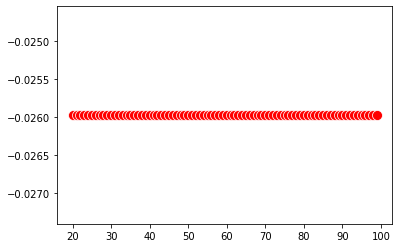

In [ ]:
sns.lineplot(x=range(20, 100), y=ssv_avg, marker='o', markersize=10, markerfacecolor='red')

<BarContainer object of 150 artists>

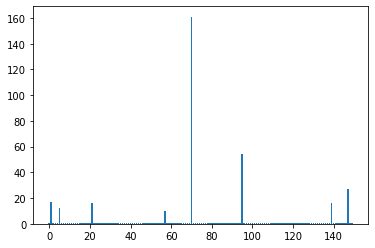

In [ ]:
label_unique = pd.Series(kmeans.labels_).unique()
plt.bar(label_unique,pd.Series(kmeans.labels_).value_counts())

In [ ]:
pd.DataFrame(pd.Series(kmeans.labels_).value_counts()).head(30)

# 시각화

In [ ]:
groups = {}

for filename, cluster in zip(filenames, kmeans.labels_):
  if cluster not in groups.keys():
    groups[cluster] = []
    groups[cluster].append(filename)
  else:
    groups[cluster].append(filename)

In [ ]:
# 폴더 만들고 이미지 저장
!mkdir /content/drive/MyDrive/image_result/vgg19_4000_350_100

In [ ]:
# model_name = 'vgg16'
# # model_name = 'resnet50' #위에서 특징추출하는 모델에서 사용한 이름과 동일하면 수정안해도 됨.

for j in range(len(groups)):
  ls = groups[j]
  if len(ls) ==1:
    pass
  elif len(ls)<10:
    figure, axs = plt.subplots(figsize=(20, 40), ncols=len(ls), nrows=1)
    for i in range(len(ls)):
      axs[i].imshow(load_image(ls[i]))
      axs[i].axis('off')
    plt.savefig('/content/drive/MyDrive/image_result/vgg19_4000_350_150/cluster_{0:03d}.png'.format(j))
  elif len(ls)%2 ==0:
    ncols=int(len(ls)/2)
    figure, axs = plt.subplots(figsize=(140, 20), ncols=ncols, nrows=2)
    for i in range(len(ls)):
      axs[i//ncols, i%ncols].imshow(load_image(ls[i]))
      axs[i//ncols, i%ncols].axis('off')
    plt.savefig('/content/drive/MyDrive/image_result/vgg19_4000_350_150/cluster_{0:03d}.png'.format(j))
  elif len(ls)%3 ==0:
    ncols=int(len(ls)/3)
    figure, axs = plt.subplots(figsize=(150, 20), ncols=ncols, nrows=3)
    for i in range(len(ls)):
      axs[i//ncols, i%ncols].imshow(load_image(ls[i]))
      axs[i//ncols, i%ncols].axis('off')
    plt.savefig('/content/drive/MyDrive/image_result/vgg19_4000_350_150/cluster_{0:03d}.png'.format(j))
  elif len(ls)%5 ==0:
    ncols=int(len(ls)/5)
    figure, axs = plt.subplots(figsize=(150, 20), ncols=ncols, nrows=5)
    for i in range(len(ls)):
      axs[i//ncols, i%ncols].imshow(load_image(ls[i]))
      axs[i//ncols, i%ncols].axis('off')
    plt.savefig('/content/drive/MyDrive/image_result/vgg19_4000_350_150/cluster_{0:03d}.png'.format(j))
  else:
    figure, axs = plt.subplots(figsize=(20, 40), ncols=len(ls), nrows=1)
    for i in range(len(ls)):
      axs[i].imshow(load_image(ls[i]))
      axs[i].axis('off')
    plt.savefig('/content/drive/MyDrive/image_result/vgg19_4000_350_150/cluster_{0:03d}.png'.format(j))

Output hidden; open in https://colab.research.google.com to view.